# Data 2022

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df_meteo2 = pd.read_csv('datasets/energia_202201-202212.csv', encoding='latin1')
df_energia2 = pd.read_csv('datasets/meteo_202201-202212.csv', encoding='latin1')
df_submission = pd.read_csv('datasets/dummy_submission.csv')

In [ ]:
df_meteo2.rename(columns={'Data': 'date', 'Hora': 'hour'}, inplace=True)
df_meteo2

In [ ]:
df_energia2

In [ ]:
# Converter a coluna 'dt_iso' para datetime
df_energia2['dt_iso'] = pd.to_datetime(df_energia2['dt_iso'], format='%Y-%m-%d %H:%M:%S %z UTC')

# Criar novas colunas 'date' e 'hour'
df_energia2['date'] = df_energia2['dt_iso'].dt.strftime('%Y-%m-%d')
df_energia2['hour'] = df_energia2['dt_iso'].dt.hour

# Reordenar as colunas
df_energia2 = df_energia2[['date', 'hour'] + [col for col in df_energia2.columns if col not in ['dt_iso', 'date', 'hour']]]

# Exibir o DataFrame resultante
df_energia2

In [ ]:
# Supondo que 'date' e 'hour' sejam colunas em ambos os DataFrames
df = pd.merge(df_energia2, df_meteo2, on=['date', 'hour'], how='inner')

# Exibir o DataFrame resultante
df

<Axes: >

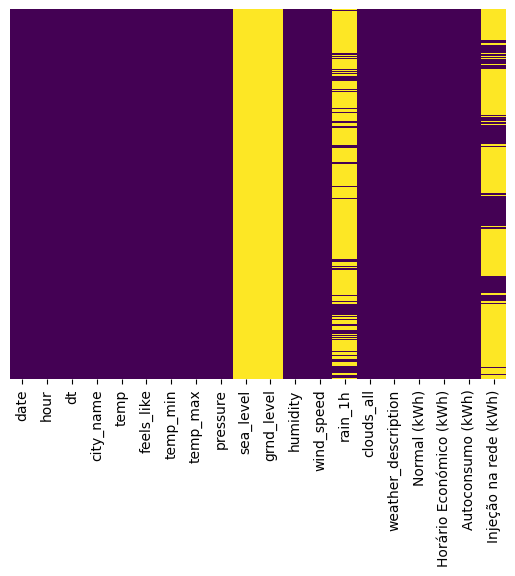

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     8760 non-null   object 
 1   hour                     8760 non-null   int32  
 2   dt                       8760 non-null   int64  
 3   city_name                8760 non-null   object 
 4   temp                     8760 non-null   float64
 5   feels_like               8760 non-null   float64
 6   temp_min                 8760 non-null   float64
 7   temp_max                 8760 non-null   float64
 8   pressure                 8760 non-null   int64  
 9   sea_level                0 non-null      float64
 10  grnd_level               0 non-null      float64
 11  humidity                 8760 non-null   int64  
 12  wind_speed               8760 non-null   float64
 13  rain_1h                  1898 non-null   float64
 14  clouds_all              

In [42]:
df = df.drop(['city_name', 'sea_level', 'grnd_level'], axis=1)

In [43]:
df

,date,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,weather_description,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh),Injeção na rede (kWh)
0,2022-01-01,0,1640995200,16.59,16.00,16.21,16.72,1024,65,3.15,NaN,97,overcast clouds,0.000,0.486,0.0,NaN
1,2022-01-01,1,1640998800,16.59,16.00,16.21,16.72,1024,65,3.14,NaN,58,broken clouds,0.000,0.429,0.0,NaN
2,2022-01-01,2,1641002400,16.59,16.03,15.67,16.72,1024,66,3.12,NaN,23,few clouds,0.000,0.463,0.0,NaN
3,2022-01-01,3,1641006000,13.59,12.75,11.61,16.16,1023,67,3.08,NaN,22,few clouds,0.000,0.545,0.0,NaN
4,2022-01-01,4,1641009600,14.97,14.27,14.72,15.66,1023,67,3.12,NaN,15,few clouds,0.000,0.439,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31,19,1672513200,15.70,15.57,15.57,15.72,1018,86,5.56,3.58,100,moderate rain,1.693,0.000,0.0,NaN
8756,2022-12-31,20,1672516800,15.55,15.43,12.72,15.70,1018,87,4.47,4.20,100,heavy intensity rain,1.327,0.000,0.0,NaN
8757,2022-12-31,21,1672520400,13.45,13.28,12.23,13.99,1019,93,3.29,4.23,100,heavy intensity rain,0.757,0.000,0.0,NaN
8758,2022-12-31,22,1672524000,12.93,12.73,12.23,13.43,1019,94,1.49,3.90,100,moderate rain,0.000,0.675,0.0,NaN


In [44]:
# Contagem de valores nulos em cada coluna
print(df.isnull().sum())

date                          0
hour                          0
dt                            0
temp                          0
feels_like                    0
temp_min                      0
temp_max                      0
pressure                      0
humidity                      0
wind_speed                    0
rain_1h                    6862
clouds_all                    0
weather_description           0
Normal (kWh)                  0
Horário Económico (kWh)       0
Autoconsumo (kWh)             0
Injeção na rede (kWh)      6087
dtype: int64


In [45]:
# Contagem de valores únicos em cada coluna
print(df.nunique())

date                        365
hour                         24
dt                         8760
temp                       2277
feels_like                 2585
temp_min                    424
temp_max                    511
pressure                     41
humidity                     82
wind_speed                  761
rain_1h                     347
clouds_all                  101
weather_description           8
Normal (kWh)               1132
Horário Económico (kWh)     789
Autoconsumo (kWh)           712
Injeção na rede (kWh)         4
dtype: int64


In [46]:
# Verificar a presença de valores NaN no DataFrame
print(df.isna().values.any())

True


In [47]:
df.describe()

,hour,dt,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,rain_1h,clouds_all,Normal (kWh),Horário Económico (kWh),Autoconsumo (kWh)
count,8760.000000,8.760000e+03,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,1898.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,11.500000,1.656761e+09,16.685846,16.380535,14.575434,17.882364,1018.003311,76.005023,2.666323,0.895474,54.443607,0.175610,0.168971,0.120871
std,6.922582,9.104179e+06,5.966659,6.488003,5.043664,6.439043,6.345541,16.714502,1.503035,1.074736,40.424382,0.337526,0.260172,0.178368
min,0.000000,1.640995e+09,0.320000,-2.190000,-0.590000,1.330000,994.000000,19.000000,0.060000,0.100000,0.000000,0.000000,0.000000,0.000000
25%,5.750000,1.648878e+09,12.400000,11.870000,11.120000,13.292500,1014.000000,65.000000,1.580000,0.210000,7.000000,0.000000,0.000000,0.000000
50%,11.500000,1.656761e+09,16.130000,15.800000,14.720000,16.820000,1018.000000,80.000000,2.400000,0.450000,61.000000,0.000000,0.000000,0.001000
75%,17.250000,1.664644e+09,19.930000,19.895000,17.720000,21.365000,1022.000000,90.000000,3.420000,1.117500,98.000000,0.239000,0.301000,0.229000
max,23.000000,1.672528e+09,40.850000,41.330000,36.720000,41.450000,1034.000000,100.000000,10.230000,6.750000,100.000000,3.251000,2.667000,1.192000
